<a href="https://colab.research.google.com/github/akash1629/Brand-Reputation-Aspect-Base-Sentiment-Analysis/blob/main/Aspect_based_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##############################################################################
# Install Dependencies (run once in your Colab environment or comment out if running locally)
##############################################################################
!pip install -q transformers torch pandas
!pip install --upgrade pandas

##############################################################################
# Imports
##############################################################################
import pandas as pd
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

##############################################################################
# 1. ZERO-SHOT ASPECT CLASSIFICATION SETUP
##############################################################################
# We'll use BART MNLI for zero-shot classification
aspect_classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli"
)

# Define candidate aspects relevant to Apple (adjust or add your own)
CANDIDATE_ASPECTS = [
    "Pricing",
    "Design",
    "Customer Service",
    "Battery Life",
    "Features",
    "Performance"
]

def extract_aspects(text, candidate_labels=CANDIDATE_ASPECTS, threshold=0.5):
    """
    Classifies text into one or more aspects using zero-shot classification.
    Returns a list of aspects found with a confidence >= threshold.
    """
    if not text.strip():
        return []

    result = aspect_classifier(text, candidate_labels, multi_class=True)
    aspects_detected = []
    for label, score in zip(result["labels"], result["scores"]):
        if score >= threshold:
            aspects_detected.append(label)
    return aspects_detected

##############################################################################
# 2. SENTIMENT ANALYSIS SETUP
##############################################################################
# We'll use a pretrained RoBERTa model from Hugging Face
MODEL_NAME = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

def get_sentiment_score(text):
    """
    Returns sentiment label and confidence for the given text.
    The model outputs [negative, neutral, positive] in that order.
    """
    if not text.strip():
        return "neutral", 0.0

    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.softmax(logits, dim=1).tolist()[0]  # [neg, neu, pos]

    sentiment_index = probs.index(max(probs))
    sentiment_labels = ["negative", "neutral", "positive"]
    return sentiment_labels[sentiment_index], float(probs[sentiment_index])

##############################################################################
# 3. DEMO PIPELINE WITH SENTIMENT140 DATA
##############################################################################
def run_sentiment140_pipeline_df(csv_file_path, keyword="Apple", limit=20):
    """
    Reads Sentiment140 CSV, filters rows containing `keyword` (case-insensitive),
    processes up to `limit` examples, and returns a DataFrame with results
    (tweet text, aspects, sentiment label, confidence).
    """
    # Read the CSV file
    df = pd.read_csv(csv_file_path, encoding="latin-1", header=None)
    df.columns = ["target", "id", "date", "query", "user", "text"]

    # Drop rows where "text" is missing
    df = df.dropna(subset=["text"])

    # Filter to rows that contain the keyword (case-insensitive)
    df = df[df["text"].str.lower().str.contains(keyword.lower())]

    # Limit the number of examples
    df = df.head(limit)

    # Prepare a list to store results
    records = []

    for idx, row in df.iterrows():
        text = row["text"]
        aspects = extract_aspects(text)
        sentiment_label, sentiment_conf = get_sentiment_score(text)

        # Build a record dictionary
        record = {
            "text": text,
            "aspects": aspects,
            "sentiment_label": sentiment_label,
            "sentiment_confidence": sentiment_conf,
        }
        records.append(record)

    # Convert records to a DataFrame
    result_df = pd.DataFrame(records)
    return result_df

##############################################################################
# 4. EXECUTION
##############################################################################
# Example usage: if you have 'training.1600000.processed.noemoticon.csv'
# or a smaller Sentiment140 sample in your environment, pass its path below.
# Adjust the keyword/limit as desired.

# Replace with your local path or uploaded file path in Colab:
csv_file = "/content/training.1600000.processed.noemoticon.csv"  # Example filename

# Uncomment to run the pipeline
result = run_sentiment140_pipeline_df(csv_file_path=csv_file, keyword="Apple", limit=20)
print(result)


Device set to use cuda:0
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a fu

                                                 text  \
0   @treesahquiche okay, about the applepears, I'v...   
1   Nasty budget due and my iphone is being sent t...   
2   Just woke up. Apples gig was ace last night. S...   
3   New iphone, yay! Not restoring backup, no!  St...   
4   I'm at disneyland again Ahaha! And i'm sad the...   
5                AppleTV has died  dreading diagnosis   
6   @helenthornber I dunno but I used to get fruit...   
7   @MyAppleStuff sadly we can't turn back time  w...   
8   Another set of iPod earbuds dying - left going...   
9   @vickybeeching saw someone at the apple store ...   
10  my mighty mouse,is no longer so mighty. itï¿½s...   
11  shaking up some apple juice and watching the s...   
12  All Apple stores closed today  maybe inventory...   
13  @xxandip I love pineapple, but it gives me tum...   
14  @CalEvans actually recently apple has been pre...   
15  @Grayda mine just shows the Apple Logo when th...   
16  I never made &lt;a href=&qu

In [ ]:
# Example usage
result_df = run_sentiment140_pipeline_df(
    csv_file_path="training.1600000.processed.noemoticon.csv",
    keyword="Apple",
    limit=20
)

display(result_df)


The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transf

,text,aspects,sentiment_label,sentiment_confidence
0,"@treesahquiche okay, about the applepears, I'v...",[],neutral,0.616417
1,Nasty budget due and my iphone is being sent t...,[Pricing],positive,0.593881
2,Just woke up. Apples gig was ace last night. S...,[Performance],positive,0.487106
3,"New iphone, yay! Not restoring backup, no! St...",[Features],positive,0.428996
4,I'm at disneyland again Ahaha! And i'm sad the...,[],negative,0.745107
5,AppleTV has died dreading diagnosis,[],negative,0.927731
6,@helenthornber I dunno but I used to get fruit...,[],neutral,0.636605
7,@MyAppleStuff sadly we can't turn back time w...,[],positive,0.462505
8,Another set of iPod earbuds dying - left going...,[],negative,0.472489
9,@vickybeeching saw someone at the apple store ...,[Customer Service],neutral,0.628534


In [ ]:
sentiment_counts = result_df["sentiment_label"].value_counts()
print(sentiment_counts)


sentiment_label
neutral     8
positive    6
negative    6
Name: count, dtype: int64


In [ ]:
# Flatten aspect lists
all_aspects = []
for asp_list in result_df["aspects"]:
    if asp_list:  # if not empty
        all_aspects.extend(asp_list)

# Count how many times each aspect occurs
import collections
aspect_counts = collections.Counter(all_aspects)
print("Aspect counts:", aspect_counts)


Aspect counts: Counter({'Features': 4, 'Performance': 3, 'Customer Service': 2, 'Pricing': 1, 'Design': 1})


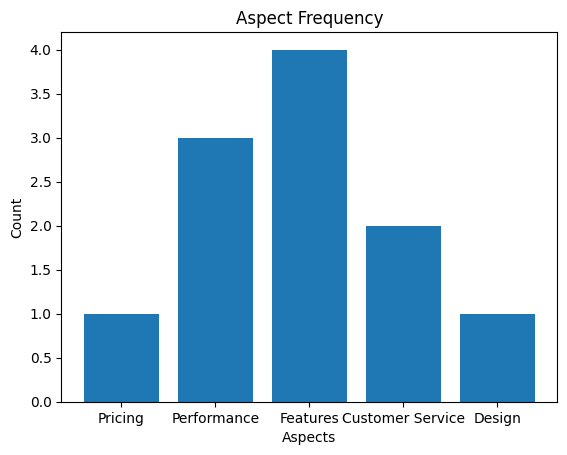

In [ ]:
import matplotlib.pyplot as plt

plt.bar(aspect_counts.keys(), aspect_counts.values())
plt.title("Aspect Frequency")
plt.xlabel("Aspects")
plt.ylabel("Count")
plt.show()


In [ ]:
import pandas as pd
from collections import defaultdict

# Create a dict of aspect -> {sentiment_label -> count}
aspect_sentiment_dict = defaultdict(lambda: defaultdict(int))

for row in result_df.itertuples():
    sentiments = row.sentiment_label
    aspects = row.aspects
    if aspects:
        for aspect in aspects:
            aspect_sentiment_dict[aspect][sentiments] += 1
    else:
        # If no aspect, you can decide to ignore or bucket as 'None'
        aspect_sentiment_dict["NoAspect"][sentiments] += 1

# Convert to a DataFrame for easier viewing
aspect_sentiment_df = []
for aspect, s_dict in aspect_sentiment_dict.items():
    aspect_sentiment_df.append({
        "aspect": aspect,
        "negative": s_dict.get("negative", 0),
        "neutral": s_dict.get("neutral", 0),
        "positive": s_dict.get("positive", 0),
    })

aspect_sentiment_df = pd.DataFrame(aspect_sentiment_df)
print(aspect_sentiment_df)


             aspect  negative  neutral  positive
0          NoAspect         5        4         3
1           Pricing         0        0         1
2       Performance         1        1         1
3          Features         1        2         1
4  Customer Service         1        1         0
5            Design         0        1         0


In [ ]:
###############################################################################
# final_langchain_agent.py
#
# Demonstrates a local LangChain pipeline with:
#  - Hugging Face embeddings (all-MiniLM-L6-v2)
#  - Local Hugging Face LLM (google/flan-t5-base)
#  - "stuff" chain type with a custom prompt referencing {context}
#  - Merged documents assigned to the variable name "context"
###############################################################################

import torch
import pandas as pd
!pip install -qU langchain-community
!pip install faiss-cpu
# LangChain imports
from langchain.docstore.document import Document
from langchain_huggingface import HuggingFacePipeline, HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate

# Transformers
from transformers import (
    pipeline as hf_pipeline,
    AutoTokenizer,
    AutoModelForSeq2SeqLM
)

def get_local_embeddings():
    """
    Local embeddings model for semantic search.
    Using 'sentence-transformers/all-MiniLM-L6-v2' as a lightweight default.
    """
    return HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

def get_local_llm():
    """
    Local HuggingFacePipeline LLM using a seq2seq model (google/flan-t5-base).
    Uses GPU if available.
    """
    model_id = "google/flan-t5-base"
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_id)

    device = 0 if torch.cuda.is_available() else -1
    generation_pipeline = hf_pipeline(
        "text2text-generation",
        model=model,
        tokenizer=tokenizer,
        max_length=512,
        temperature=0.7,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        device=device
    )
    llm = HuggingFacePipeline(pipeline=generation_pipeline)
    return llm

def create_langchain_agent(df: pd.DataFrame):
    """
    Builds a "stuff" chain-based RetrievalQA agent with:
     - FAISS vector store from local embeddings
     - Local LLM (flan-t5)
     - Single prompt referencing {context} for merged docs
     - document_variable_name set to "context"
    """
    # Convert each row to a short "document"
    def row_to_text(row):
        return (
            f"Tweet: {row['text']}\n"
            f"Aspects: {', '.join(row['aspects'])}\n"
            f"Sentiment: {row['sentiment_label']} (Confidence: {row['sentiment_confidence']:.2f})"
        )

    docs = [Document(page_content=row_to_text(r)) for _, r in df.iterrows()]

    # Create FAISS vector store
    embeddings = get_local_embeddings()
    vectordb = FAISS.from_documents(docs, embeddings)

    # Create local LLM
    llm = get_local_llm()

    # Single prompt that expects {context} for the merged docs
    prompt = PromptTemplate(
        template=(
            "You are an AI assistant that provides answers based on the given context.\n\n"
            "Context:\n{context}\n\n"
            "Question: {question}\n"
            "Answer:"
        ),
        input_variables=["context", "question"]
    )

    # Create the RetrievalQA chain using chain_type="stuff"
    # We rename the doc variable to "context" to match our prompt
    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="stuff",
        retriever=vectordb.as_retriever(search_kwargs={"k": 3}),
        chain_type_kwargs={
            "document_variable_name": "context",
            "prompt": prompt
        }
    )
    return qa_chain

###############################################################################
# EXAMPLE USAGE
###############################################################################
if __name__ == "__main__":
    # Example data
    df = pd.DataFrame({
        "text": [
            "I love my new Apple device!",
            "Battery life on Apple phones is too short.",
            "The new design looks great but it's pricey."
        ],
        "aspects": [
            ["Features"],
            ["Battery Life"],
            ["Design", "Pricing"]
        ],
        "sentiment_label": [
            "positive",
            "negative",
            "mixed"
        ],
        "sentiment_confidence": [
            0.95,
            0.88,
            0.75
        ]
    })

    # Build the agent
    agent = create_langchain_agent(df)

    # Ask a question (use .invoke for newer LangChain versions)
    question = "What do people say about the pricing?"
    answer = agent.invoke(question)
    print("Q:", question)
    print("A:", answer["result"])  # final answer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 71.2 MB/s eta 0:00:00


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cuda:0


Q: What do people say about the pricing?
A: mixed


In [ ]:
!ps aux | grep ngrok | awk '{print $2}' | xargs kill -9

kill: (11435): No such process
^C


In [ ]:
#########################
# 1. Install & Import
#########################
!pip install -q streamlit pyngrok nest_asyncio transformers torch pandas altair
!pip install -qU langchain-huggingface
!pip install --upgrade matplotlib

import os
import nest_asyncio
import threading
import pandas as pd
import torch
import altair as alt
import streamlit as st

from pyngrok import ngrok
from google.colab import output
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Apply nest_asyncio so Streamlit + pyngrok can coexist in Colab
nest_asyncio.apply()

#########################
# 2. ngrok Setup
#########################
NGROK_AUTH_TOKEN = "YOUR_NGROK_AUTHTOKEN"  # Put your real token here
if NGROK_AUTH_TOKEN != "YOUR_NGROK_AUTHTOKEN":
    !ngrok config add-authtoken $NGROK_AUTH_TOKEN

def start_ngrok():
    public_url = ngrok.connect(addr="8501")
    print("********************************************************")
    print("Public URL:", public_url)
    print("********************************************************")

#########################
# 3. Aspect & Sentiment Pipeline
#########################
# Zero-shot classification for aspects
aspect_classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli"
)
CANDIDATE_ASPECTS = ["Pricing","Design","Customer Service","Battery Life","Features","Performance"]

def extract_aspects(text, threshold=0.5):
    if not text.strip():
        return []
    result = aspect_classifier(text, CANDIDATE_ASPECTS, multi_class=True)
    aspects_detected = []
    for label, score in zip(result["labels"], result["scores"]):
        if score >= threshold:
            aspects_detected.append(label)
    return aspects_detected

# Sentiment with RoBERTa
MODEL_NAME = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

def get_sentiment_score(text):
    if not text.strip():
        return "neutral", 0.0
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.softmax(logits, dim=1).tolist()[0]
    idx = probs.index(max(probs))
    sentiments = ["negative","neutral","positive"]
    return sentiments[idx], float(probs[idx])

def analyze_text(text):
    aspects = extract_aspects(text)
    sentiment_label, sentiment_conf = get_sentiment_score(text)
    return {
        "text": text,
        "aspects": aspects,
        "sentiment_label": sentiment_label,
        "sentiment_confidence": sentiment_conf
    }

#########################
# 4. Write Streamlit code into app.py
#########################
app_code = """import streamlit as st
import pandas as pd
import altair as alt
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

def get_sentiment_score(text, tokenizer, model):
    if not text.strip():
        return "neutral", 0.0
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.softmax(logits, dim=1).tolist()[0]
    idx = probs.index(max(probs))
    sentiments = ["negative","neutral","positive"]
    return sentiments[idx], float(probs[idx])

def extract_aspects(text, threshold=0.5):
    if not text.strip():
        return []
    aspect_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
    aspects = ["Pricing","Design","Customer Service","Battery Life","Features","Performance"]
    result = aspect_classifier(text, aspects, multi_class=True)
    aspects_detected = []
    for label, score in zip(result["labels"], result["scores"]):
        if score >= threshold:
            aspects_detected.append(label)
    return aspects_detected

def analyze_text(text):
    # We re-initialize model here for a self-contained example (inefficient!)
    # In a real scenario, you'd do it once outside.
    tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
    model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
    aspects = extract_aspects(text)
    sentiment_label, sentiment_conf = get_sentiment_score(text, tokenizer, model)
    return {
        "text": text,
        "aspects": aspects,
        "sentiment_label": sentiment_label,
        "sentiment_confidence": sentiment_conf
    }

st.title("Aspect-Based Sentiment Analysis Demo")

st.markdown("Zero-shot classification (BART) for aspects, RoBERTa for sentiment.")

st.subheader("Quick Test")
user_input = st.text_area("Enter text:")
if st.button("Analyze"):
    if user_input.strip():
        result = analyze_text(user_input)
        st.write("**Aspects**:", result["aspects"])
        st.write("**Sentiment**:", result["sentiment_label"],
                 f"(confidence={result['sentiment_confidence']:.2f})")
    else:
        st.warning("Please enter some text above.")

st.write("---")

st.subheader("Batch CSV Analysis")
csv_file = st.file_uploader("Upload CSV with 'text' column", type=["csv"])
if csv_file:
    df = pd.read_csv(csv_file, encoding="latin-1", nrows=1000)
    if "text" not in df.columns:
        st.error("No 'text' column found in CSV!")
    else:
        keyword = st.text_input("Keyword filter (optional):")
        limit = st.number_input("Limit rows", value=20, min_value=1, max_value=500)
        if st.button("Process CSV"):
            if keyword.strip():
                df = df[df["text"].str.lower().str.contains(keyword.lower())]
            df = df.head(limit)

            results = []
            for _, row in df.iterrows():
                txt = str(row["text"])
                results.append(analyze_text(txt))
            result_df = pd.DataFrame(results)
            st.dataframe(result_df)

            all_aspects = []
            for asp_list in result_df["aspects"]:
                all_aspects.extend(asp_list)

            if all_aspects:
                import collections
                aspect_counts = collections.Counter(all_aspects)
                aspect_df = pd.DataFrame(aspect_counts.items(), columns=["aspect","count"])
                chart = alt.Chart(aspect_df).mark_bar().encode(
                    x="aspect",
                    y="count",
                    tooltip=["aspect","count"]
                )
                st.altair_chart(chart, use_container_width=True)

            sentiment_counts = result_df["sentiment_label"].value_counts()
            sentiment_df = pd.DataFrame({
                "sentiment": sentiment_counts.index,
                "count": sentiment_counts.values
            })
            chart2 = alt.Chart(sentiment_df).mark_bar().encode(
                x="sentiment",
                y="count",
                tooltip=["sentiment","count"]
            )
            st.altair_chart(chart2, use_container_width=True)
"""

with open("app.py", "w") as f:
    f.write(app_code)

#########################
# 5. Launch Streamlit + Ngrok
#########################
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

# Start the tunnel
start_ngrok()

# Launch in another thread
thread = threading.Thread(target=run_streamlit)
thread.start()


Device set to use cuda:0


********************************************************
Public URL: NgrokTunnel: "https://51d0-34-16-170-101.ngrok-free.app" -> "http://localhost:8501"
********************************************************
